In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import det,inv
from math import sqrt,pi
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score,mean_squared_error
from collections import Counter


# 1. Analyze: Data1 using ridge regression.
(a) Report the pre-processing and validation techniques used.
(b) Plot different λ values (regularization parameters values) against training error
and validation error, in a single figure and mark the optimal one. Plot J(w).
(c) Report the parameters of the model.
(d) Assess the performance of the model.
(e) Plot the hyperplane that generates the data.


In [2]:
# L2 Regularization with Python
def ridge_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    #X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.zeros(n , )
 
    # stores the updates on the cost function (loss function)
    cost_total,cost_t,cost_v = [],[],[]
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = np.dot(X,W.T)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y
 
        # regularization term
        ridge_term = (lambda_value / 2 * m) * np.sum(np.square(W))
 
        # calculate the cost (MSE) + regularization term
        lsq_cost = (1 / 2 * m) * np.sum(error ** 2)
        cost  = (1 / 2 * m) * np.sum(error ** 2) + ridge_term
        # Update our gradient by the dot product between
        # the transpose of 'X' and our error + lambda value * W
        # divided by the total number of samples
        gradient = (1 / m) * (X.T.dot(error) + (lambda_value * W))
 
        # Now we have to update our weights
        W = W - alpha * gradient
 
        # Let's print out the cost to see how these values
        # changes after every iteration
        #print(f"cost:{cost} \t iteration: {current_iteration}")
 
        # keep track the cost as it changes in each iteration
        cost_total.append(cost)
        cost_t.append(lsq_cost)
        cost_v.append(ridge_term)
 
    return W, cost_total,cost_t,cost_v

def predict(W,X):
    return np.dot(W,X.T)



Parameters of the model are:
 0    2.594601
1    3.105915
2   -0.994599
dtype: float64
MSE by Ridge Regression 541.0325557649871


Text(0.5, 1.0, 'Cost v/s  λ')

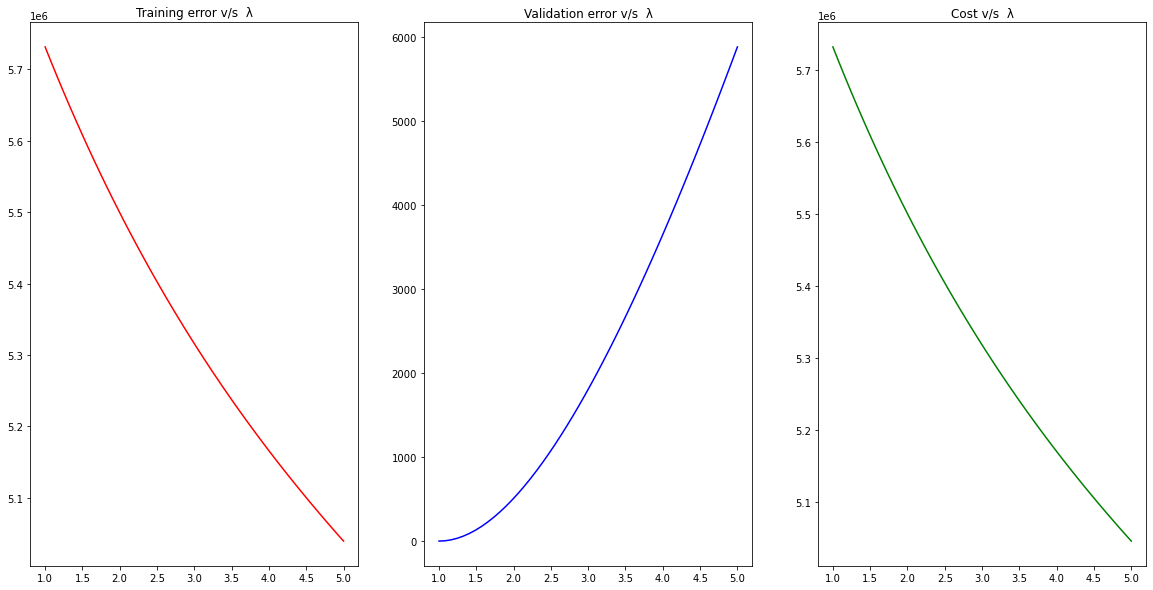

In [3]:
data1 = pd.read_csv('data1.csv',header=None)
data1.head()
#data1 = pd.concat([pd.Series(1, index=data1.index, name='00'), data1], axis=1)


X = data1.iloc[:,:-1]
X

Y =data1.iloc[:,-1]
m=np.shape(X)[0]

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X = np.concatenate((np.ones((m, 1)), X), axis=1)
X = pd.DataFrame(X) 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

lambda_list = np.linspace(1,5,50)


for lambda_ in lambda_list:
        # calls ridge regression function with different values of lambda
        w, cost_total,cost_t,cost_v = ridge_regression(x_train, y_train, alpha=0.01,
                                     lambda_value=lambda_, epochs=50)
print('Parameters of the model are:\n',w)
y_pred = predict(w,x_test)
print("MSE by Ridge Regression",(np.sum((y_test-y_pred)**2))/len(y_test))
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(lambda_list,cost_t,c='r')
plt.title('Training error v/s  λ')
plt.subplot(1,3,2)
plt.plot(lambda_list,cost_v,c='b')
plt.title('Validation error v/s  λ')
plt.subplot(1,3,3)
plt.plot(lambda_list,cost_total,c='g')
plt.title('Cost v/s  λ')

Text(0, 0.5, 'Y')

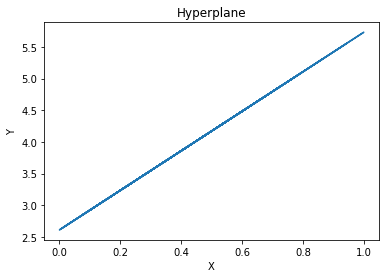

In [4]:
dec = -(w[0] +(w[1]*x_test.iloc[:,1])) /(w[2])


plt.plot(x_test.iloc[:,1],dec)
plt.title('Hyperplane')
plt.xlabel('X')
plt.ylabel('Y')
#plt.scatter(x_test.loc[:,1],x_test.loc[:,2],c=y_pred)

# 2. Analyze Data 2 using regularized logistic regression
(a) Report the hyperparameters.
(b) Plot J(w).
(c) Assess the performance of the model.
(d) Plot the hyperplane that separates the data.


In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def Probability(theta, X):
    return sigmoid(np.dot(X,theta))


def  cost_log(theta, x, y, Lambda,alpha,iteration):
    norm=10
    for current_iteration in np.arange(iteration):
        while norm > 0.001:
    # Computes the cost function for all the training samples
            m = x.shape[0]
            total_cost = (-(1 /2* m) * np.sum(
            np.dot(y.T, np.log(Probability( theta,x))) + np.dot((1 - y).T, np.log(
                    1 - Probability(theta,x))))) + (Lambda/ 2)* np.sum(np.dot(theta, theta.T))
            grad=(((1/m)* np.dot(x.T, Probability(theta,x)-y)) + np.sum((Lambda/m )* theta))
            w = theta
            theta = theta + alpha*grad
            norm = np.linalg.norm(w-theta)
        
    return total_cost,theta
"""
def Gradient_log( theta, X,y, Lambda,alpha ):
    m=X.shape[0]

    grad=(((1/m)* np.dot(X.T, Probability(theta,X)-y)) + np.sum((Lambda/m )* theta))
    theta = theta + alpha*grad
    return(theta)
"""

def pred(X, w,threshold):
        y_pred=[]
        for i in range(X.shape[0]):
            if Probability(w,X).any() >= threshold:
            
                y_pred.append(1)
            else:
                y_pred.append(-1)
        return y_pred

Parameters of the model: [0.00644953 0.00240371 0.00543274 0.00325627]
Accuracy 0.5333333333333333


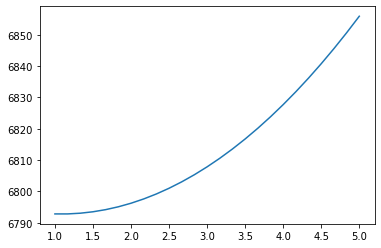

In [36]:
data2 = pd.read_csv('data2.csv',header=None)
X = data2.iloc[:,:-1]
Y = data2.iloc[:,-1]
data2[3].value_counts()
m = X.shape[0]
n = X.shape[1]
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X = np.concatenate((np.ones((m, 1)), X), axis=1)

X = pd.DataFrame(X) 
w = np.zeros(n+1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

lambda_list = np.linspace(1,5,25)
lr = np.linspace(0,0.001,25)
cost_total=[]

for Lambda,lr in zip(lambda_list,lr):
    cost,w = cost_log(w,x_train,y_train,Lambda,lr,300)
    cost_total.append(cost)
cost_total
plt.plot(lambda_list,cost_total)
print('Parameters of the model:',w)
y_pred = pred(x_test,w,0.5)
print('Accuracy',(sum(y_pred==y_test))/len(y_test))
x = np.linspace(min(x_train),max(x_train),60)
y =w[0] + w[1]*x_test.iloc[:,1] + w[2]*x_test.iloc[:,2] + w[3]*x_test.iloc[:,-1]

In [37]:
#plt.scatter(x_test.iloc[:,1],x_test.iloc[:,2],c=y_test)

dec = (w[0] +(w[1]*x_test.iloc[:,1]) + (w[2]*x_test.iloc[:,2]) +(w[3]*x_test.iloc[:,-1]))
#plt.plot(x_test.iloc[:,2],dec)


# 4. Analyze AutoMpg using ridge regression (download from UCI web repository)
(a) Discuss the experimental results.
(b) Compare the performance of the model with any other algorithm you know.

In [54]:
data_mpg = pd.read_csv('auto-mpg.csv')
data_mpg.isnull().sum()
data_mpg=data_mpg[data_mpg.horsepower!='?']
data_c = data_mpg.copy()
#X = data_mpg.drop(['mpg'],axis=1,inplace=True)

In [55]:
#data_mpg['car name'].unique()
# encoding the data
data_mpg=pd.concat([data_mpg,pd.get_dummies(data_mpg.origin,prefix='origin')],axis=1)
data_mpg.drop('origin',axis=1,inplace=True)

In [56]:
data_mpg=pd.concat([data_mpg,pd.get_dummies(data_mpg.cylinders,prefix='cylinders')],axis=1)
data_mpg.drop('cylinders',axis=1,inplace=True)

In [57]:
data_mpg=pd.concat([data_mpg,pd.get_dummies(data_mpg['model year'],prefix='year')],axis=1)
data_mpg.drop('model year',axis=1,inplace=True)

In [58]:
Y =data_c.iloc[:,0]
data_mpg.drop(['mpg'],axis=1,inplace=True)


In [59]:
X = data_mpg[::]

#scaler = preprocessing.MinMaxScaler()
#X = scaler.fit_transform(X)
#X = pd.DataFrame(X) 
#
data_mpg['car name'].value_counts()
data_mpg['car name']=[i[0] for i in data_mpg['car name'].str.split(' ')]
data_mpg['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [60]:
data_mpg['car name']=data_mpg['car name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data_mpg['car name']=data_mpg['car name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
data_mpg['car name']=data_mpg['car name'].replace('maxda','mazda')
data_mpg['car name']=data_mpg['car name'].replace('toyouta','toyota')
data_mpg['car name']=data_mpg['car name'].replace('mercedes','mercedes-benz')
data_mpg['car name']=data_mpg['car name'].replace('nissan','datsun')
data_mpg['car name']=data_mpg['car name'].replace('capri','ford')


data_mpg=pd.concat([data_mpg,pd.get_dummies(data_mpg['car name'],prefix='car')],axis=1)
data_mpg.drop('car name',axis=1,inplace=True)

In [61]:
data_mpg[['displacement','horsepower','weight','acceleration']]=scaler.fit_transform(data_mpg[['displacement','horsepower','weight','acceleration']])
X = pd.DataFrame(data_mpg)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

#model = RidgeRegression( iterations = 1000,learning_rate = 0.05, lam= 1 )
#model.fit( x_train, y_train )
      
    # Prediction on test set
#y_pred = model.predict( x_test )  

#print("MSE by Ridge Regression",(np.sum((y_test-y_pred)**2))/len(y_test))
lambda_list = np.linspace(1,5,50)


for lambda_ in lambda_list:
        # calls ridge regression function with different values of lambda
        w, cost_total,cost_t,cost_v = ridge_regression(x_train, y_train, alpha=0.01,
                                     lambda_value=lambda_, epochs=50)
print('Parameters of the model are:\n',w)
y_pred = predict(w,x_test)
print("MSE by Ridge Regression",(np.sum((y_test-y_pred)**2))/len(y_test))

# By Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
print('MSE by Linear Regression',mean_squared_error(y_test,y_pred1))


Parameters of the model are:
 displacement         1.919478
horsepower           2.039952
weight               2.474720
acceleration         4.035237
origin_1             4.232200
origin_2             1.625911
origin_3             2.534179
cylinders_3          0.098026
cylinders_4          5.642563
cylinders_5          0.127612
cylinders_6          1.429888
cylinders_8          1.094201
year_70              0.347043
year_71              0.516647
year_72              0.302340
year_73              0.509889
year_74              0.583323
year_75              0.446857
year_76              0.695589
year_77              0.703124
year_78              0.827996
year_79              0.625060
year_80              1.170622
year_81              0.777001
year_82              0.886798
car_amc              0.384117
car_audi             0.245609
car_bmw              0.065439
car_buick            0.290942
car_cadillac         0.046834
car_chevrolet        0.844758
car_chrysler         0.065969
car_datsun

# 5. Consider Data 3. 
Let the data be generated by the model f(p) = ap21 + bp1 p2 +cp22 +d where p = (p1, p2)T
(a) Report the parameters of the model.
(b) Report the performance of the model.
 

In [62]:
data3 = pd.read_csv('data3.csv',header=None)
data3.head()

,0,1,2
0,2.769400,-1.34990,35.6070
1,3.034900,0.72540,13.8790
2,-0.063055,0.71474,-4.7861
3,-0.204970,-0.12414,-5.9449
4,1.489700,1.40900,-3.7678


In [63]:
data3 = pd.concat([pd.Series(1, index=data3.index, name='00'), data3], axis=1)
data3.head()
X = data3.iloc[:,:-1]
X_c = X.copy()

In [64]:
X[2]=X[0]**2
X[3]=X[0]*X[1]
X[4]=X[1]**2
Y= data3.iloc[:,-1]

m = len(X)
X = X/X.max()
X1 = X.drop([0,1],axis=1,inplace=True)

In [65]:

x_train3,x_test3,y_train3,y_test3 = train_test_split(X,Y,test_size=0.3,random_state=42)
x_train3

,00,2,3,4
169,1.0,0.011646,0.052060,0.050971
97,1.0,0.010237,0.009925,0.002108
31,1.0,0.060759,-0.034422,0.004271
12,1.0,0.071145,0.569950,1.000000
35,1.0,0.004173,-0.066539,0.232372
...,...,...,...,...
106,1.0,0.279157,0.473443,0.175857
14,1.0,0.061876,-0.247377,0.216604
92,1.0,0.000058,0.000283,0.000303
179,1.0,0.121300,0.071820,0.009313


In [66]:
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)

def gradientDescent(X, y, theta, alpha, epoch,m):
    J=[]
    k=0
    norm =10
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            w = theta
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
            if np.linalg.norm(w-theta[c])<0.0001:
                break
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta

In [67]:
theta = np.array([0.0]*len(X.columns))
c, theta = gradientDescent(x_train3, y_train3, theta, 0.05, 700,m)
y_pred3 = hypothesis(x_test3, theta)
print('Parameters of the model are:','a =', theta[1],'b =',theta[2],'c =',theta[3],'d=',theta[0])
print("MSE:",(np.sum((y_test3-y_pred3)**2))/len(y_test3))



Parameters of the model are: a = 12.101819824939467 b = -9.181693611871282 c = 5.5743258234678015 d= -3.0754943228619096
MSE: 27.625382402034166


# 6. Analyze Data 4 and Data 5 using decision tree
(a) Describe the procedure you used for the analysis.
(b) Access the performance of the model.


In [2]:
data4 = pd.read_csv('data4.csv',header=None)
X =data4.iloc[:,:-1]
Y =data4.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

print('Accuracy = ',(sum(y_test==y_pred))/len(y_pred))

Accuracy =  0.8979591836734694


In [8]:
data5 = pd.read_csv('data5.csv',header=None)
X =data5.iloc[:,:-1]
Y =data5.iloc[:,-1]

# preprocessing by minmaxscaler
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X= pd.DataFrame(X)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print('Accuracy = ',(sum(y_test==y_pred))/len(y_pred))

Accuracy =  0.7777777777777778


# 9. Develop 5th, 7th and 8th degree polynomial models for Data 6
(a) Report the pre-processing and validation techniques used.
(b) Report the parameters of the model.
(c) Plot the graph of the resulting models.
(d) Compare the performance of the models statistical measures (t test) and select
the best among them.


In [130]:
data6 = pd.read_csv('data6.csv',header=None)
data6.head()
# 5th degree polynomial model
X6=data6.iloc[:,:-1]
Y6 = data6.iloc[:,-1]
#X6[1]=X6[0]**2
for i in range(1,6):
    X6[i]=X6[0]**i

scaler = preprocessing.MinMaxScaler()
X6 = scaler.fit_transform(X6)
X6= pd.DataFrame(X6)
m =len(X6)
#x_train,x_test,y_train,y_test = train_test_split(X6,Y6,test_size=0.3,random_state=42)

a= np.linspace(0.001,0.1,20)



MSE =[]
m =len(X6)
#x_train,x_test,y_train,y_test = train_test_split(X6,Y6,test_size=0.3,shuffle=True)
for j in a:
    x_train,x_test,y_train,y_test = train_test_split(X6,Y6,test_size=0.3,shuffle=True)
    theta1 = np.array([0.0]*len(X6.columns))
    J, theta1 = gradientDescent(x_train, y_train, theta1, j, 300,m)
    y_p = hypothesis(x_test, theta1)
    e=(np.sum((y_test-y_p)**2))/len(y_test)
    MSE.append(e)
error =(pd.DataFrame({"MSE":MSE,'Alpha':a}))
    
error
#print("MSE:",(np.sum((y_test-y_pred)**2))/len(y_test))



,MSE,Alpha
0,862.345135,0.001000
1,952.019118,0.006211
2,1176.615540,0.011421
3,1321.406488,0.016632
4,1018.215360,0.021842
5,905.287830,0.027053
6,917.052324,0.032263
7,1142.039800,0.037474
8,904.657211,0.042684
9,1304.994302,0.047895


In [131]:
for i in (range(20)):
    if MSE[i]==min(MSE):
        alpha=(a[i])
        w1 = (theta1)
print('Parameters of the model are:',w1)
y_pred = hypothesis(x_test, w1)

Parameters of the model are: [10.91512615 10.91512615 24.71520036 11.39020536 51.52256763  4.09633302]


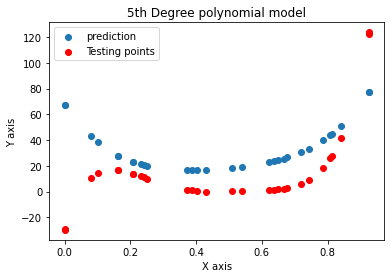

In [132]:
plt.scatter(x_test.iloc[:,0],y_pred,label='prediction')
plt.scatter(x_test.iloc[:,0],y_test,c='r',label='Testing points')
plt.title('5th Degree polynomial model')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

In [128]:
X6_c = X6.copy()
for i in [6,7,8]:
    X6_c[i]=X6_c[0]**i
X6_8 = X6_c.copy()
X6_7 = X6_c.drop([8],axis=1,inplace=True)
X6_c

,0,1,2,3,4,5,6,7
0,0.740578,0.740578,0.240305,0.535197,0.057793,0.470663,1.649779e-01,1.221791e-01
1,0.087441,0.087441,0.628681,0.210406,0.395300,0.284470,4.469862e-07,3.908497e-08
2,0.676965,0.676965,0.133351,0.498780,0.017812,0.458771,9.624887e-02,6.515707e-02
3,0.453397,0.453397,0.005337,0.472876,0.000030,0.455224,8.686995e-03,3.938654e-03
4,0.196252,0.196252,0.335319,0.370739,0.112496,0.419733,5.713231e-05,1.121232e-05
...,...,...,...,...,...,...,...,...
95,0.611129,0.611129,0.055563,0.480013,0.003101,0.455624,5.209493e-02,3.183670e-02
96,0.568337,0.568337,0.022948,0.474936,0.000532,0.455270,3.370027e-02,1.915309e-02
97,0.521798,0.521798,0.003528,0.473206,0.000013,0.455226,2.018433e-02,1.053214e-02
98,0.260668,0.260668,0.204728,0.424243,0.041956,0.444881,3.137065e-04,8.177314e-05


In [134]:
# for 7 th degree polynomial
scaler = preprocessing.MinMaxScaler()
X6_c = scaler.fit_transform(X6_c)
X6_c= pd.DataFrame(X6_c)
m =len(X6_c)
#x_train,x_test,y_train,y_test = train_test_split(X6_c,Y6,test_size=0.3,random_state=42)

MSE1 =[]

#x_train,x_test,y_train,y_test = train_test_split(X6,Y6,test_size=0.3,shuffle=True)
for j in a:
    x_train,x_test,y_train,y_test = train_test_split(X6_c,Y6,test_size=0.3,shuffle=True)
    theta2 = np.array([0.0]*len(X6_c.columns))
    J, theta2 = gradientDescent(x_train, y_train, theta2, j, 300,m)
    y_p = hypothesis(x_test, theta2)
    e=(np.sum((y_test-y_p)**2))/len(y_test)
    MSE1.append(e)
error2 =(pd.DataFrame({"MSE":MSE1,'Alpha':a}))
    
error2



,MSE,Alpha
0,2420.912394,0.001000
1,617.718915,0.006211
2,609.494058,0.011421
3,708.153211,0.016632
4,764.230887,0.021842
5,432.385148,0.027053
6,1115.724743,0.032263
7,391.823523,0.037474
8,1974.649222,0.042684
9,1747.070340,0.047895


In [136]:
for i in (range(20)):
    if MSE1[i]==min(MSE1):
        alpha=(a[i])
        w2 = (theta2)
print('Parameters of the model are:',w2)
y_pred = hypothesis(x_test, w2)

Parameters of the model are: [-6.37557859 -6.37557859  5.05869075  8.74753796 23.95127813  8.95489609
 71.32748428 73.86834926]


MSE: 212.38837792477574


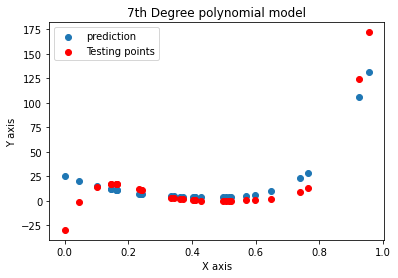

In [137]:

print("MSE:",(np.sum((y_test-y_pred)**2))/len(y_test))

plt.scatter(x_test.iloc[:,0],y_pred,label='prediction')
plt.scatter(x_test.iloc[:,0],y_test,c='r',label='Testing points')
plt.title('7th Degree polynomial model')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

In [138]:
scaler = preprocessing.MinMaxScaler()
X6_8 = scaler.fit_transform(X6_8)
X6_8= pd.DataFrame(X6_8)
m =len(X6_8)
MSE2 =[]

#x_train,x_test,y_train,y_test = train_test_split(X6,Y6,test_size=0.3,shuffle=True)
for j in a:
    x_train,x_test,y_train,y_test = train_test_split(X6_8,Y6,test_size=0.3,shuffle=True)
    theta3 = np.array([0.0]*len(X6_8.columns))
    J, theta3 = gradientDescent(x_train, y_train, theta3, j, 300,m)
    y_p = hypothesis(x_test, theta3)
    e=(np.sum((y_test-y_p)**2))/len(y_test)
    MSE2.append(e)
error3 =(pd.DataFrame({"MSE":MSE2,'Alpha':a}))
    
error3




,MSE,Alpha
0,2103.862601,0.001000
1,1043.761995,0.006211
2,514.423044,0.011421
3,1280.543323,0.016632
4,1253.037210,0.021842
5,750.558985,0.027053
6,474.041393,0.032263
7,1055.270158,0.037474
8,381.332830,0.042684
9,194.838795,0.047895


In [142]:
for i in (range(20)):
    if MSE2[i]==min(MSE2):
        alpha=(a[i])
        w3 = (theta3)
print('Parameters of the model are:',w3)
y_pred = hypothesis(x_test, w3)
print("MSE:",(np.sum((y_test-y_pred)**2))/len(y_test))

Parameters of the model are: [-7.07901952 -7.07901952  1.41533995  7.22116378 17.47283786  8.7068302
 60.13295336 62.5953164  63.89465014]
MSE: 124.38408445133044


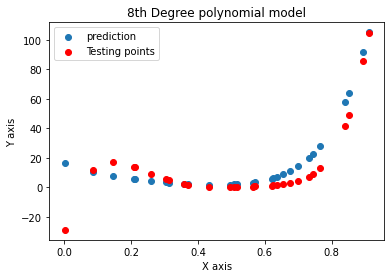

In [143]:
plt.scatter(x_test.iloc[:,0],y_pred,label='prediction')
plt.scatter(x_test.iloc[:,0],y_test,c='r',label='Testing points')
#plt.scatter(x_train.iloc[:,0],y_train,c='g')
plt.title('8th Degree polynomial model')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

In [315]:
#compare the performance by t test

from scipy import stats
print(stats.ttest_rel(error['MSE'],error2['MSE']))
print(stats.ttest_rel(error['MSE'],error3['MSE']))
#stats.ttest_rel(error2['MSE'],error3['MSE'])

Ttest_relResult(statistic=2.124305040665147, pvalue=0.04699171699876664)
Ttest_relResult(statistic=3.3122611567624913, pvalue=0.003662745788099298)


# 10. Analyze Data7 using KNN
(a) Apply Euclidean Distance, Mahalonabis distance and Manhattan distance and
compare the performance.
(b) Discuss the method used to find the hyperparameters. Report their values.
(c) Discuss the performance of the model.
(d) Plot ROC Curve.


In [242]:
def euclidean_dist(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan(x1,x2):
    return sum(np.abs(val1-val2) for val1,val2 in zip(x1,x2))


class Knn:
    
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,y):
        self.x_train = X
        self.y_train = y
        
    def predict(self,X):
        predicted_label1 = [self.pred_euc(x) for x in X]
        predicted_label2 = [self.pred_manh(x) for x in X]
        #predicted_label3 = [self.pred_m(x) for x in X]
        #
        return np.array(predicted_label1),np.array(predicted_label2)
    
    def pred_euc(self,x):
        # compute the distances
        #1  Euclidean Distance
        
        distance1 = [euclidean_dist(x,x_train) for x_train in self.x_train]
        #print(distance1)
        k_ind1 = np.argsort(distance1)[:self.k]
        #print(k_ind1)
        k_n_labels1 = [self.y_train[i] for i in k_ind1]
        
        most_common1 = Counter(k_n_labels1).most_common(1)
        return most_common1[0][0]
    
    def pred_manh(self,x):
        # compute the distances
        #1  Euclidean Distance
        
        distance2 = [manhattan(x,x_train) for x_train in self.x_train]
        #print(len(distance2))
        k_ind2 = np.argsort(distance2)[:self.k]
        #print(k_ind2)
        k_n_labels2 = [self.y_train[i] for i in k_ind2]
        #print(len(k_n_labels2))
        most_common2 = Counter(k_n_labels2).most_common(1)
        #print(most_common2[0][0])
        return most_common2[0][0]
    

In [243]:
data7 = pd.read_csv('data7.csv',header=None)

X7 = data7.iloc[:,:-1]
Y7 = data7.iloc[:,-1]
X7= np.array(X7)
Y7= np.array(Y7)

x_train7,x_test7,y_train7,y_test7 = train_test_split(X7,Y7,test_size=0.3,random_state=42)

   k  Euclidean  Manhattan
0  1   0.983333   0.983333
1  2   0.983333   0.983333
2  3   0.983333   0.983333
3  4   0.983333   0.983333
4  5   0.991667   0.991667
5  6   0.983333   0.983333
6  7   0.983333   0.983333


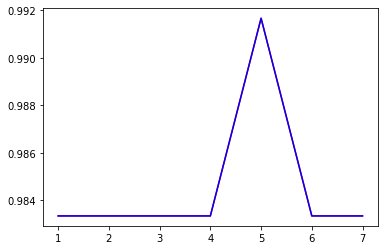

In [244]:
acc1,acc2,acc3=[],[],[]

for i in np.arange(1,8):
    clf = Knn(k=i)
    clf.fit(x_train7,y_train7)
    y_pred7_e,y_pred7_manh = clf.predict(x_test7)
    a1 = (np.sum([y_pred7_e==y_test7]))/len(y_test7)
    a2 = (np.sum([y_pred7_manh==y_test7]))/len(y_test7)
    #a3 = (np.sum([y_pred7_m==y_test7]))/len(y_test7)
    acc1.append(a1)
    acc2.append(a2)
    #acc3.append(a3)
    fpr,tpr,k = roc_curve(y_test7,y_pred7_e)
    #plt.plot(fpr, tpr, label='ROC')
df = pd.DataFrame({'k':np.arange(1,8),'Euclidean':acc1,'Manhattan':acc2,})
print(df)
plt.plot(np.arange(1,8),acc1,c='r')
plt.plot(np.arange(1,8),acc2,c='b')

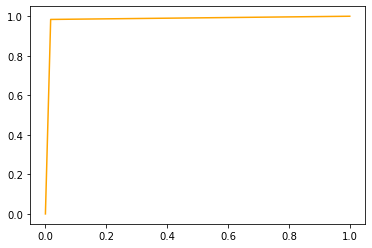

In [150]:
fpr,tpr,k = roc_curve(y_test7,y_pred7_e)
plt.plot(fpr, tpr, color='orange', label='ROC')

(120, 3)
(3, 3)
{'k': 1, 'accuracy': 0.5}
{'k': 2, 'accuracy': 0.5}
{'k': 3, 'accuracy': 0.5083333333333333}
{'k': 4, 'accuracy': 0.5166666666666667}
{'k': 5, 'accuracy': 0.49166666666666664}
{'k': 6, 'accuracy': 0.49166666666666664}
{'k': 7, 'accuracy': 0.5}


Text(0, 0.5, 'Accuracy')

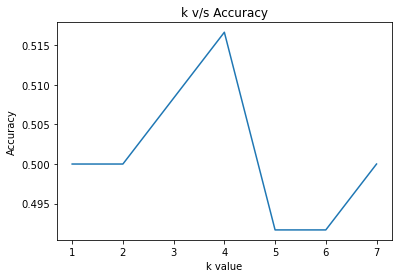

In [192]:
def mahalanobis(x,data):
    x_mu = x-np.mean(data.T)
    print(x_mu.shape)
    cov = np.cov(data.T)
    print(cov.shape)
    inv_cov = np.linalg.inv(cov)
    dist = np.dot(np.dot(x_mu,inv_cov),x_mu.T)
    return dist

d = mahalanobis(x_test7,x_train7) 
def fun(k):
    k_ind = np.argsort(d)[:k]
    k_n_labels = [y_test7[i] for i in k_ind]
    c=[]
    v=[]
    k_n_labels = np.array(k_n_labels)
    for i in range(120):
        for j in range(k):
            v.append(k_n_labels[j,i])
    v = np.array_split(v,120)
    for i in v:
        #print(Counter(i))
        x = Counter(i).most_common(1)
        #print(x[0][0])
        c.append(x[0][0])
    c= np.array(c)
    c
    a =0
    acc=[]
    for i in range(120):
        if c[i] == y_test7[i]:
            a +=1
    Accuracy = a/len(y_test7)
    #acc.append(Accuracy)
    return({'k':k,'accuracy':Accuracy}),Accuracy,k

q ={}
w,e=[],[]
for k in range(1,8):
    t,a,i = fun(k)
    print(t)
    w.append(a)
    e.append(k)
plt.plot(e,w)
plt.title('k v/s Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')

# 11. Apply regularized logistic regression, Decision tree and KNN on Breast Cancer Wisconsin (Diagnostic) Data Set (download the data from UCI web repository). Apply k fold and hold out cross validation techniques.
(a) Report the preprocessing techniques.
(b) Report the value of the performance measures used.
(c) Compare the performance of the algorithms using t test.

In [3]:
data_b = pd.read_csv('wdbc.data',header=None)
data_b.drop([0],axis=1,inplace=True)

In [27]:

Y = data_b[1]
Y = Y.replace(to_replace=('M','B'),value=(-1,1))
X = data_b.iloc[:,1:]

# Decision Tree
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X= pd.DataFrame(X)
a1=[]
for i in range(25):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle = True)

    model2 = DecisionTreeClassifier()
    model2.fit(x_train, y_train)
    y_pred = model2.predict(x_test)
    acc = sum(y_test==y_pred)/len(y_pred)
    a1.append(acc)
print('Accuracyby Decision tree =',np.mean(a1))




Accuracyby Decision tree = 0.9256140350877193


In [28]:
m = X.shape[0]
n = X.shape[1]
#X = np.concatenate((np.ones((m, 1)), X), axis=1)

X = pd.DataFrame(X) 
w = np.zeros(n)
#x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Hold out validation
lambda_list = np.linspace(1,5,25)
lr = np.linspace(0,0.0001,25)
cost_total=[]
a=[]
for Lambda,lr in zip(lambda_list,lr):
    w0 = w
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True)
    cost,w = cost_log(w,x_train,y_train,Lambda,lr,300)
    cost_total.append(cost)
    y_pred = pred(x_test,w,0.5)
    acc=(np.sum(y_pred==y_test))/len(y_test)
    a.append(acc)
    reg_log = pd.DataFrame({'Lambda':Lambda,'Alpha':lr,'Accuracy':a})
    #if np.linalg.norm(w-w0)<=0.0001:
    for i in range(len(a)):
        if a[i] ==max(a):
            w_opt,j,accuracy = w,i,a[i]
            print(a[i])

cost_total
#plt.plot(lambda_list,cost_total)
#print('Parameters of the model:',w)
#y_pred = pred(x_test,w,0.5)
print('Hyperparameters corresponding to maximum accuracy:',reg_log.iloc[j])
print('Accuracy by regularized Logistic regression',accuracy)

0.631578947368421
0.6491228070175439
0.672514619883041
0.672514619883041
0.672514619883041
0.695906432748538
0.695906432748538
0.695906432748538
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
0.7192982456140351
Hyperparameters corresponding to maximum accuracy: Lambda      5.000000
Alpha       0.000100
Accuracy    0.719298
Name: 8, dtype: float64
Accuracy by regularized Logistic regression 0.7192982456140351


Accuracy by k-Nearest Neighbours: 0.9883040935672515


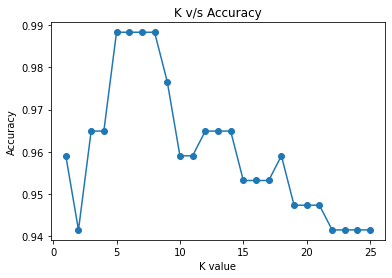

In [34]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
a3,k=[],[]

for i in range(1,26):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_p = knn.predict(x_test)
    acc=((np.sum(y_p==y_test))/len(y_test))
    a3.append(acc)
    
    k.append(i)
plt.plot(k,a3,marker='o')
plt.title('K v/s Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
print('Accuracy by k-Nearest Neighbours:',max(a3))

In [35]:
#compare performance of algorithms by t test

from scipy import stats
print(stats.ttest_rel(a1,a))
print(stats.ttest_rel(a1,a3))
# All the three algorithms differ in their performance.

Ttest_relResult(statistic=40.532756932816056, pvalue=1.2877275308538183e-23)
Ttest_relResult(statistic=-9.246380316719845, pvalue=2.219409403048148e-09)
